Midcentury average temperature: 12.86


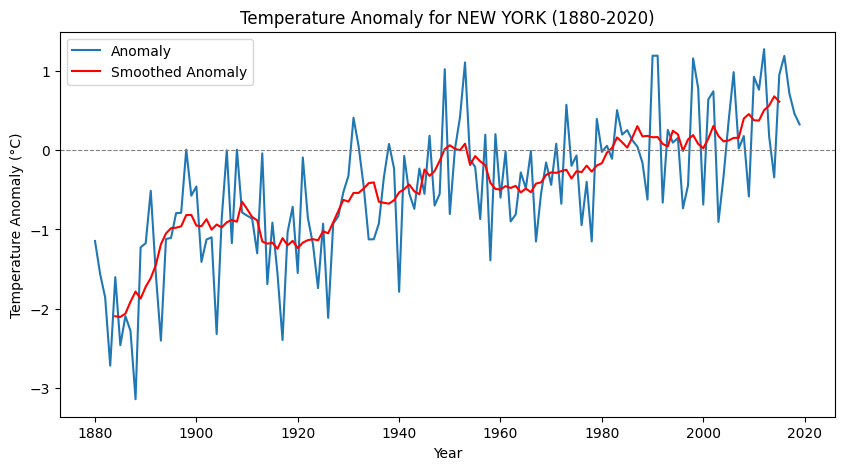

<ipython-input-16-56cd9b596c81>:48: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)


Using ('USW00014922', 44.8831, -93.2289, 265.8, 'MN', 'MINNEAPOLIS/ST PAUL AP', 'GSN', 'HCN', '72658').


<ipython-input-16-56cd9b596c81>:48: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)


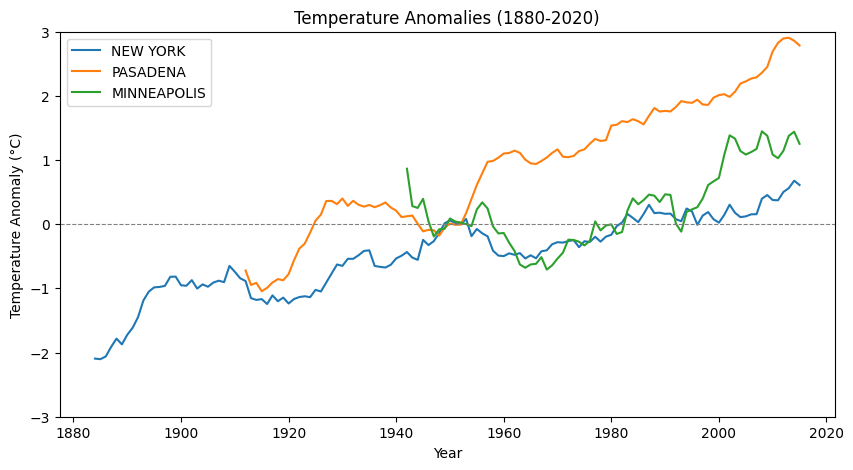

In [16]:
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

# Enable inline plotting for Jupyter
%matplotlib inline

# Import the custom getweather module
import getweather

# Define a smoothing function
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window) / window, mode)

# Step 1: Get all historical data for New York (1880-2020)
station = 'NEW YORK'
allyears = np.arange(1880, 2020)

# Fetch temperature data for all years
alldata = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                     for year in allyears])

# Step 2: Compute yearly averages (TMIN + TMAX)/2
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

# Step 3: Compute midcentury average (1945-1955)
midcentury = np.nanmean(allavg[65:75])  # Indexes correspond to years 1945-1955
print(f"Midcentury average temperature: {midcentury:.2f}")

# Step 4: Plot temperature anomalies relative to the midcentury average
pp.figure(figsize=(10, 5))
pp.plot(allyears, allavg - midcentury, label="Anomaly")
pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label="Smoothed Anomaly", color="red")
pp.axhline(0, color='gray', linestyle='--', linewidth=0.8)
pp.title(f"Temperature Anomaly for {station} (1880-2020)")
pp.xlabel("Year")
pp.ylabel("Temperature Anomaly (°C)")
pp.legend()
pp.show()

# Step 5: Define a function to plot anomalies for any station
def plotanomaly(station):
    alldata = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                         for year in allyears])
    allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])  # Midcentury years 1945-1955
    smoothed_anomaly = smooth(allavg - midcentury, 9, 'valid')

    pp.plot(allyears[4:-4], smoothed_anomaly, label=station)
    pp.axis(ymin=-3, ymax=3)

# Step 6: Plot anomalies for multiple stations
pp.figure(figsize=(10, 5))
plotanomaly('NEW YORK')
plotanomaly('PASADENA')
plotanomaly('MINNEAPOLIS')
pp.axhline(0, color='gray', linestyle='--', linewidth=0.8)
pp.title("Temperature Anomalies (1880-2020)")
pp.xlabel("Year")
pp.ylabel("Temperature Anomaly (°C)")
pp.legend()
pp.show()
